In [724]:
import importlib
import utils
import transformers
import model
import losses

from sklearn.metrics import mean_squared_error

In [725]:
from model import *
from utils import *

In [726]:
importlib.reload(utils)
importlib.reload(transformers)
importlib.reload(model)
importlib.reload(losses)

<module 'losses' from 'd:\\Documents\\machinelearning\\cgm-paper\\src\\losses.py'>

In [727]:
print("Current working directory: ", os.getcwd())

Current working directory:  d:\Documents\machinelearning\cgm-paper\src


In [728]:
raw_dir = "../data/raw"
tuning_dir = "../data/tuning"

In [729]:
assert os.path.exists(raw_dir), "Raw data directory not found"
assert os.path.exists(tuning_dir), "Tuning data directory not found"

In [730]:
dataset = load_data(raw_dir)

Found 22 files in ../data/raw


train (139415, 47)
test (32912, 47)


In [731]:
val_dataset = load_data(tuning_dir)

Found 2 files in ../data/tuning
train (13630, 43)
test (3002, 43)


In [732]:
for key in dataset.keys():
    val_dataset[key] = reduce_classes(val_dataset[key])
    dataset[key] = reduce_classes(dataset[key])

In [733]:
dataset.get("train")['Time'].isnull().sum()

0

In [734]:
train_data = get_train_dataset(dataset['train'])
test_data = get_any_dataset(dataset['test'], dataset['train'])

      CGM  month  day  hour  minute  weekday  year  cgm_velo  change  \
24  129.0      5   19    13      35        2  2027  0.003333     1.0   
25  127.0      5   19    13      40        2  2027  0.000000     0.0   
26  124.0      5   19    13      45        2  2027 -0.006667    -2.0   
27  123.0      5   19    13      50        2  2027 -0.010000    -3.0   
28  124.0      5   19    13      55        2  2027 -0.003333    -1.0   

    upper_band  ...  extreme_CGM_80  extreme_CGM_85  extreme_CGM_90  \
24  198.092207  ...               0               0               0   
25  198.840303  ...               0               0               0   
26  198.288080  ...               0               0               0   
27  196.078435  ...               0               0               0   
28  192.197842  ...               0               0               0   

    extreme_CGM_95  wCGM(1)     wCGM(2)     wCGM(3)  wCGM(4)     wCGM(5)  \
24               0    129.0  128.333333  127.666667    127.8  12

The tuning data will be merged with the training data and be fitted into the pipeline to be used for the validation data

In [735]:
tuning_data = get_tuning_dataset(val_dataset['train'], dataset['train'])
val_data = get_any_dataset(val_dataset['test'], tuning_data)

In [736]:
trainX, trainY = train_data.drop(["CGM"], axis = 1), train_data["CGM"]
trainX.shape, trainY.shape

((120010, 20), (120010,))

In [737]:
testX, testY = test_data.drop(["CGM"], axis = 1), test_data["CGM"]
testX.shape, testY.shape

((26845, 20), (26845,))

In [754]:
testX.iloc[-12]

month                1.000000
day                 23.000000
hour                20.000000
minute              20.000000
weekday              6.000000
year              2022.000000
cgm_velo            -0.003333
change              -1.000000
upper_band         261.579141
lower_band         130.670859
extreme_CGM_80       0.000000
extreme_CGM_85       0.000000
extreme_CGM_90       0.000000
extreme_CGM_95       0.000000
wCGM(1)            163.000000
wCGM(2)            163.666667
wCGM(3)            164.833333
wCGM(4)            167.300000
wCGM(5)            170.200000
wCGM(6)            172.428571
direction           -1.000000
Name: 32900, dtype: float64

In [738]:
testX.tail(10)

,month,day,hour,minute,weekday,year,cgm_velo,change,upper_band,lower_band,extreme_CGM_80,extreme_CGM_85,extreme_CGM_90,extreme_CGM_95,wCGM(1),wCGM(2),wCGM(3),wCGM(4),wCGM(5),wCGM(6)
32902,1,23,20,30,6,2022,-0.003333,-1.0,255.454615,125.378718,0,0,0,0,159.0,159.666667,161.333333,162.4,163.600000,165.714286
32903,1,23,20,35,6,2022,0.000000,0.0,249.763697,125.069636,0,0,0,0,159.0,159.000000,159.500000,160.9,161.933333,163.095238
32904,1,23,20,40,6,2022,-0.010000,-3.0,244.899161,124.184172,0,0,0,0,156.0,158.000000,158.500000,159.1,160.400000,161.428571
32905,1,23,20,45,6,2022,-0.006667,-2.0,239.876988,123.539679,0,0,0,0,154.0,155.333333,157.166667,157.9,158.600000,159.857143
32906,1,23,20,50,6,2022,-0.006667,-2.0,235.326687,122.673313,0,0,0,0,152.0,153.333333,154.666667,156.4,157.266667,158.047619
32907,1,23,20,55,6,2022,-0.006667,-2.0,231.007617,121.742383,0,0,0,0,150.0,151.333333,152.666667,154.0,155.666667,156.619048
32908,1,23,21,0,6,2022,-0.003333,-1.0,226.195461,121.387873,0,0,0,0,149.0,149.666667,150.833333,152.1,153.400000,155.000000
32909,1,23,21,5,6,2022,-0.003333,-1.0,221.190096,121.393237,0,0,0,0,148.0,148.666667,149.333333,150.4,151.600000,152.857143
32910,1,23,21,10,6,2022,0.010000,3.0,217.096903,121.403097,0,0,0,0,151.0,149.000000,149.000000,149.4,150.266667,151.333333
32911,1,23,21,15,6,2022,-0.006667,-2.0,213.194437,121.305563,0,0,0,0,149.0,150.333333,149.166667,149.1,149.400000,150.142857


In [739]:
model = HybridModel()
model.fit(trainX, trainY, testX, testY, eval = True, tune = False)

Base fitted with columns: Index(['month', 'day', 'hour', 'minute', 'weekday', 'year', 'cgm_velo',
       'change', 'upper_band', 'lower_band', 'extreme_CGM_80',
       'extreme_CGM_85', 'extreme_CGM_90', 'extreme_CGM_95', 'wCGM(1)',
       'wCGM(2)', 'wCGM(3)', 'wCGM(4)', 'wCGM(5)', 'wCGM(6)', 'direction'],
      dtype='object')
Base: (16.233021131639433, 4.029022354323619, 0.07677582651024074)
Base + Residuals: (16.147939518751404, 4.018449890038621, 0.07643201608935095) Change: 4.291430039246293%


In [750]:
from sklearn.metrics import mean_squared_error


def plot_forecast(y, n_steps = 12, lookback = 12, use_confi = True):
    result = model.forecast(testX.iloc[:-n_steps], n_steps = n_steps, return_X = False, use_confi = use_confi)
    forecast = result["forecasts"]
    actual = y.iloc[-n_steps - lookback:].reset_index(drop = True)
    plt.figure(figsize = (15, 5))
    if use_confi:
        confi_int = result["confi_forecasts"]
        plt.plot(np.arange(lookback, len(forecast) + lookback), confi_int['Median'], label = "Median", color = "red")
        plt.fill_between(np.arange(lookback, len(forecast) + lookback), confi_int["Lower"], confi_int["Upper"], color = "red", alpha = 0.15)

    plt.plot(actual, label = "Actual", color = "blue")
    plt.plot(np.arange(lookback, len(forecast) + lookback), forecast, label = "Forecast", color = "red")
    plt.legend()
    plt.show()
    
    print("RMSE", np.sqrt(mean_squared_error(actual.iloc[lookback:], forecast)))

Forecasting: 100%|██████████| 6/6 [00:01<00:00,  3.48it/s]


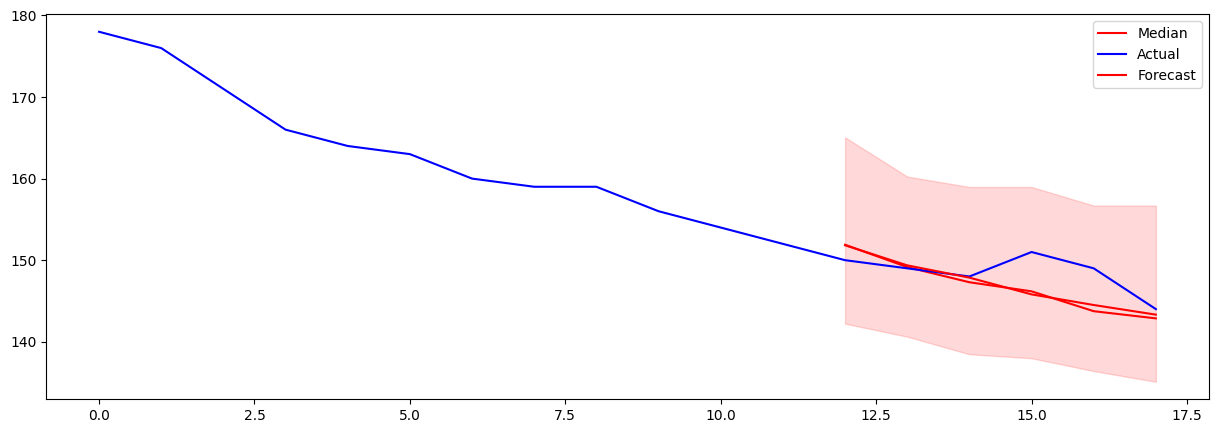

RMSE 2.9196641815119184


In [751]:
plot_forecast(testY, n_steps = 6, use_confi = True)